<a href="https://colab.research.google.com/github/theyagub/BirPos1/blob/master/KNN_ile_is.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))  # uploaded-dan ilk faylı oxuyuruq
print("Dataset uğurla yükləndi!")
print(df.head())


Saving LoanDataset.csv to LoanDataset.csv
Dataset uğurla yükləndi!
   customer_id  customer_age customer_income home_ownership  \
0          1.0            22           59000           RENT   
1          2.0            21            9600            OWN   
2          3.0            25            9600       MORTGAGE   
3          4.0            23           65500           RENT   
4          5.0            24           54400           RENT   

   employment_duration loan_intent loan_grade   loan_amnt  loan_int_rate  \
0                123.0    PERSONAL          C  £35,000.00          16.02   
1                  5.0   EDUCATION          A   £1,000.00          11.14   
2                  1.0     MEDICAL          B   £5,500.00          12.87   
3                  4.0     MEDICAL          B  £35,000.00          15.23   
4                  8.0     MEDICAL          B  £35,000.00          14.27   

   term_years historical_default  cred_hist_length Current_loan_status  
0          10           

In [2]:
df = df.head(100)
print(f"Seçilmiş dataset shape: {df.shape}")

Seçilmiş dataset shape: (100, 13)


In [3]:
print(df.info())
print("\nBoş dəyərlər sayı:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          100 non-null    float64
 1   customer_age         100 non-null    int64  
 2   customer_income      100 non-null    object 
 3   home_ownership       100 non-null    object 
 4   employment_duration  100 non-null    float64
 5   loan_intent          100 non-null    object 
 6   loan_grade           100 non-null    object 
 7   loan_amnt            100 non-null    object 
 8   loan_int_rate        88 non-null     float64
 9   term_years           100 non-null    int64  
 10  historical_default   54 non-null     object 
 11  cred_hist_length     100 non-null    int64  
 12  Current_loan_status  100 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 10.3+ KB
None

Boş dəyərlər sayı:
 customer_id             0
customer_age            0
custo

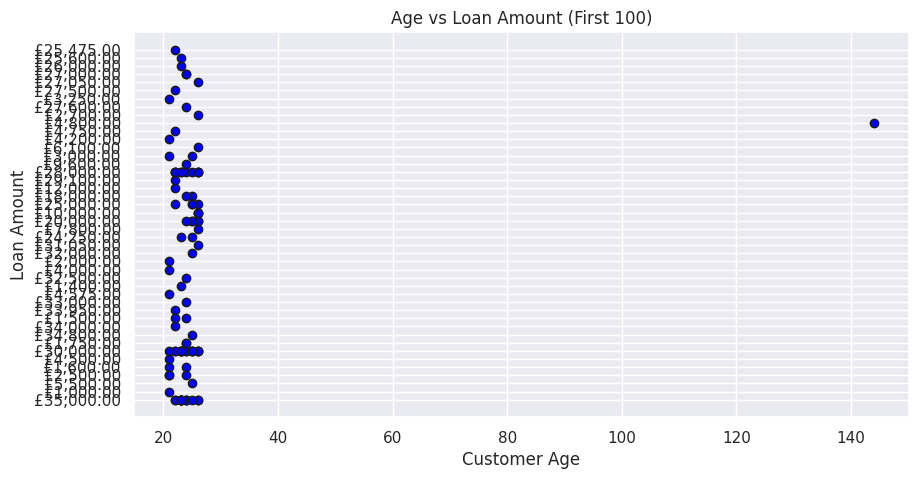

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(10,5))
plt.scatter(df['customer_age'], df['loan_amnt'], c='blue', edgecolors='k')
plt.xlabel('Customer Age')
plt.ylabel('Loan Amount')
plt.title('Age vs Loan Amount (First 100)')
plt.show()

In [5]:
X = df[['customer_age', 'customer_income']]
y = df['loan_int_rate']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train/Test bölündü")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


Train/Test bölündü
X_train shape: (80, 2), X_test shape: (20, 2)


In [8]:
df = df[['customer_age', 'customer_income', 'loan_int_rate']].dropna()

X = df[['customer_age', 'customer_income']]
y = df['loan_int_rate']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)
print("Decision Tree modeli fit edildi")

Decision Tree modeli fit edildi


In [12]:
y_pred = tree_model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Test MSE: 21.88


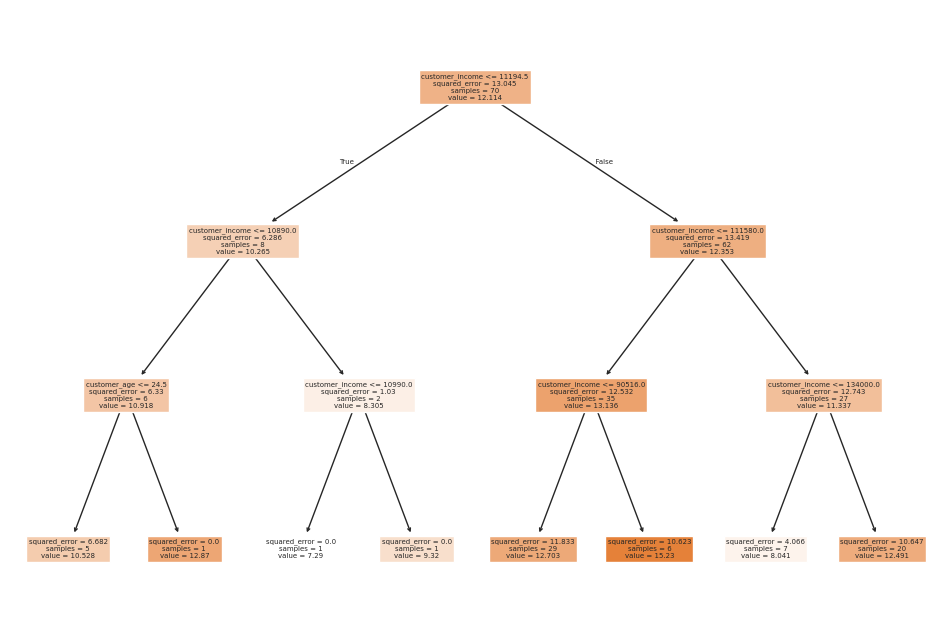

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=['customer_age', 'customer_income'], filled=True)
plt.show()